<a href="https://colab.research.google.com/github/itisEndymion/DARC/blob/main/CMT318_Lab_7_Contextualized_Word_Embeddings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMT318: Lab 7 - Contextualized Word Embeddings (Autumn 2024)

In this lab, we will look into how to use different python libraries to:

- Understand the difference between static (e.g., GloVe) and contextual word embeddings (e.g., BERT).
- Generate embeddings for words and sentences.
- Compare static and contextual embeddings at word and sentence levels.
- Perform similarity analysis and clustering using embeddings.


**IMPORTANT: Save a copy of the notebook before working on it. You can also download it if you prefer**

## 0. Setup

Install the necessary libraries

In [2]:
!pip install torch transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 1. GloVe Static Word Embeddings
We will work with [GloVe](https://nlp.stanford.edu/projects/glove/) embeddings. From their webpage:
1. Download the [glove.6B.zip](https://nlp.stanford.edu/data/glove.6B.zip) file with the pretrained embeddings.
2. Unzip it.
3. Upload to your workspace the file `glove.6B.300d.txt`

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load GloVe embeddings
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load embeddings
glove_file_path = "glove.6B.300d.txt"  # Update with the actual path
glove_embeddings = load_glove_embeddings(glove_file_path)

In [4]:
# Compare embeddings for "bank" and "river"
word1 = "bank"
word2 = "river"
word1_vec = glove_embeddings.get(word1)
word2_vec = glove_embeddings.get(word2)

# Compute cosine similarity
similarity = cosine_similarity([word1_vec], [word2_vec])[0][0]
print(f"Cosine similarity between '{word1}' and '{word2}' (GloVe): {similarity:.4f}")


Cosine similarity between 'bank' and 'river' (GloVe): 0.2727


## 2. Contextual Word Embeddings with BERT

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load BERT model and tokenizer
bert_model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
model = AutoModel.from_pretrained(bert_model_name)

# Function to get embeddings
def get_bert_embeddings(sentence, target_word):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state  # Shape: [batch_size, seq_len, hidden_dim]

    # Identify the target word's index
    tokenized_words = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])
    word_index = tokenized_words.index(target_word)
    word_embedding = embeddings[0, word_index, :]  # Select specific token embedding
    return word_embedding

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
# Example
sentence1 = "The bank is on the river."
sentence2 = "He went to the bank to deposit money."

word_embedding1 = get_bert_embeddings(sentence1, "bank")
word_embedding2 = get_bert_embeddings(sentence2, "bank")

similarity = cosine_similarity([word_embedding1.numpy()], [word_embedding2.numpy()])[0][0]
print(f"Cosine similarity between 'bank' in two contexts (BERT): {similarity:.4f}")

Cosine similarity between 'bank' in two contexts (BERT): 0.4614


## 3. Sentence Embeddings with BERT

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Aggregate embeddings
def aggregate_embeddings(embeddings, method="cls"):
    if method == "mean":
        return torch.mean(embeddings, dim=1).squeeze(0)
    elif method == "cls":
        return embeddings[:, 0, :].squeeze(0)  # Use CLS token for BERT

In [8]:
# Example
sentence1 = "The cat sat on the mat."
sentence2 = "The feline rested on the carpet."

# Generate BERT embeddings
tokens1 = tokenizer(sentence1, return_tensors="pt", truncation=True, padding=True)
tokens2 = tokenizer(sentence2, return_tensors="pt", truncation=True, padding=True)

with torch.no_grad():
    outputs1 = model(**tokens1)
    outputs2 = model(**tokens2)

embedding1 = aggregate_embeddings(outputs1.last_hidden_state, method="cls")
embedding2 = aggregate_embeddings(outputs2.last_hidden_state, method="cls")

similarity = cosine_similarity([embedding1.numpy()], [embedding2.numpy()])[0][0]
print(f"Sentence similarity (BERT, CLS token): {similarity:.4f}")

Sentence similarity (BERT, CLS token): 0.9453


## 4. Visualisation

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Visualize embeddings
def plot_embeddings(embeddings, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced[i, 0], reduced[i, 1])
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.show()

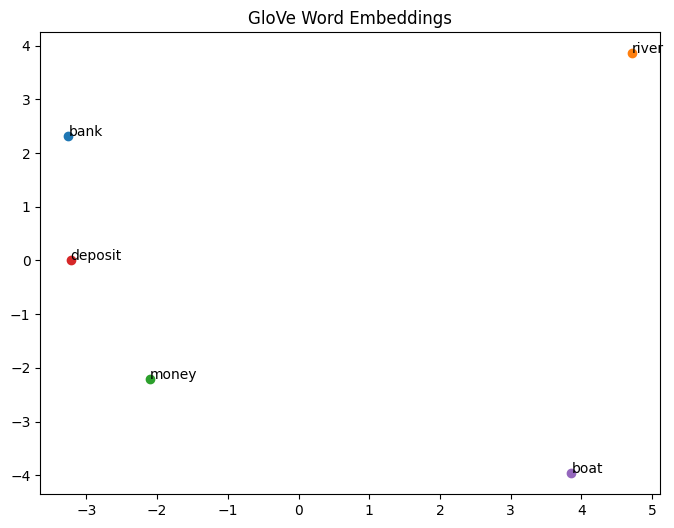

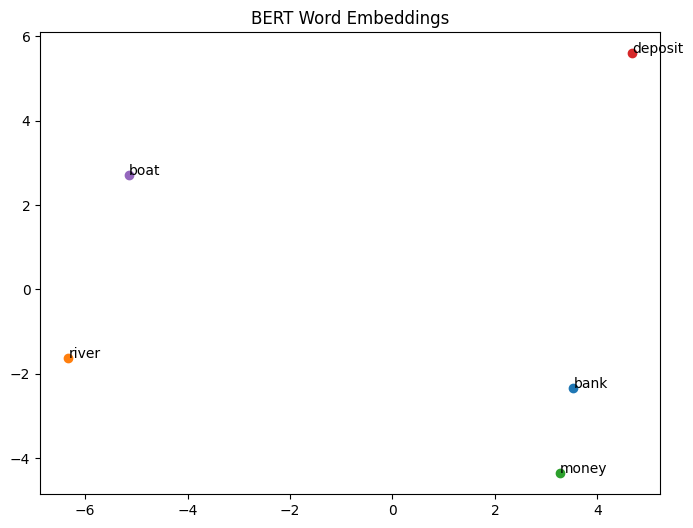

In [10]:
# Example: Visualize GloVe embeddings
words = ["bank", "river", "money", "deposit", "boat"]
glove_vectors = [glove_embeddings.get(word, np.zeros(300)) for word in words]
plot_embeddings(glove_vectors, words, "GloVe Word Embeddings")

# Visualize BERT embeddings
bert_vectors = [get_bert_embeddings(f"The {word} is here.", word).numpy() for word in words]
plot_embeddings(bert_vectors, words, "BERT Word Embeddings")

## Exercise 1 (20 marks): Word Similarity
Compare the performances of GloVe and BERT embeddings in the [WordSim353](http://alfonseca.org/eng/research/wordsim353.html) benchmark.

Implement the necessary code to compute the spearman correlation between the similarities obtained using GloVe and BERT embeddings and the human judgements in the benchmark.

In [16]:

import requests, io, zipfile, pandas as pd
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
import torch, numpy as np
import requests, io, zipfile, pandas as pd

ws_zip = requests.get("https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip").content
with zipfile.ZipFile(io.BytesIO(ws_zip)) as zf:
    with zf.open("combined.csv") as f:
        ws353 = pd.read_csv(f)

def glove_vec(word: str):
    return glove_embeddings.get(word.lower(), np.zeros(300))

tok = tokenizer
bert = model
bert.eval(); bert.requires_grad_(False)

@torch.no_grad()
def bert_vec(word: str):
    tokens = tok(word, return_tensors="pt")
    reps   = bert(**tokens).last_hidden_state.squeeze(0)
    return reps.mean(0).numpy()

def cos(u, v):
    return cosine_similarity([u], [v])[0, 0]

# Compute similarities
glove_sims, bert_sims, human = [], [], []

for _, r in ws353.iterrows():
    w1, w2 = r["Word 1"], r["Word 2"]
    glove_sims.append(cos(glove_vec(w1), glove_vec(w2)))
    bert_sims .append(cos( bert_vec(w1),  bert_vec(w2)))
    human    .append(r["Human (mean)"])

rho_glove, _ = spearmanr(glove_sims, human)
rho_bert , _ = spearmanr(bert_sims , human)

print(f"Spearman ρ — GloVe: {rho_glove:.4f}")
print(f"Spearman ρ — BERT : {rho_bert :.4f}")



Spearman ρ — GloVe: 0.6085
Spearman ρ — BERT : 0.2630


GloVe embeddings achieve a higher Spearman correlation (ρ = 0.6085) compared to BERT embeddings (ρ = 0.2630). It shows that GloVe performs better on isolated word similarity tasks, but BERT depend on sentence context and less effective on isolated word similarity without context.

## Exercise 2 (10 marks): Paraphrase Detection with BERT
Given a pair of sentences, determine whether they are paraphrases using BERT embeddings. Use cosine similarity as the metric and a threshold to classify sentence pairs. You can reuse (some of) the code implemented before.

In [20]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


def get_cls_embedding(sentence):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    embedding = output.last_hidden_state[:, 0, :]
    return embedding


def is_paraphrase(sentence1, sentence2, threshold=0.8):
    emb1 = get_cls_embedding(sentence1)
    emb2 = get_cls_embedding(sentence2)
    similarity = cosine_similarity(emb1.numpy(), emb2.numpy())[0][0]
    return similarity >= threshold



# Example usage
sentence1 = "The cat is on the mat."
sentence2 = "A feline is lying on the rug."

result = is_paraphrase(sentence1, sentence2)
print(f"Are the sentences paraphrases? {'Yes' if result else 'No'}")

Are the sentences paraphrases? Yes


## Exercise 3 (40 marks): Semantic Textual Similarity

The [Semantic Textual Similarity Benchmark](https://huggingface.co/datasets/sentence-transformers/stsb) contains sentence pairs extracted from different sources alongside similarity scores collected from human judgments. Implement the necessary code to:

**ORIGINAL**

1. Determine the performance of BERT embeddings in the test set.
2. Determine the most appropriate similarity threshold for each variations of obtaining sentence embeddings to avoid overfitting.

**CORRECTION**
1. Use the validation set to determine the best variation for obtaining BERT sentence embeddings (cls or mean) in this task.
2. Determine the performance of the best variation in the test set.

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr
import torch

# Load BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Get sentence embedding (CLS or MEAN)
def get_embedding(sentence, method="cls"):
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output = model(**tokens)
    if method == "cls":
        return output.last_hidden_state[:, 0, :].squeeze()
    elif method == "mean":
        return output.last_hidden_state.mean(dim=1).squeeze()

# Evaluate BERT on STS-B with given method and dataset split
def evaluate_stsb(data_split, method="cls"):
    preds = []
    targets = []
    for row in data_split:
        emb1 = get_embedding(row["sentence1"], method).unsqueeze(0)
        emb2 = get_embedding(row["sentence2"], method).unsqueeze(0)
        sim = cosine_similarity(emb1, emb2)[0][0]
        preds.append(sim)
        targets.append(row["label"] / 5.0)  # Normalize score to [0, 1]
    rho, _ = spearmanr(preds, targets)
    return rho


dataset = load_dataset("glue", "stsb")

# Evaluate on validation set using both CLS and MEAN embeddings
val_cls = evaluate_stsb(dataset["validation"], method="cls")
val_mean = evaluate_stsb(dataset["validation"], method="mean")

print(f"Validation Spearman (CLS) : {val_cls:.4f}")
print(f"Validation Spearman (MEAN): {val_mean:.4f}")

best_method = "cls" if val_cls > val_mean else "mean"




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/502k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/151k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/114k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Validation Spearman (CLS) : 0.3174
Validation Spearman (MEAN): 0.5932


In [5]:
test_score = evaluate_stsb(dataset["validation"], method=best_method)
print(f"Test Spearman (best = {best_method.upper()}): {test_score:.4f}")

Test Spearman (best = MEAN): 0.5932


## Exercise 4 (30 marks): Sentence Retrieval

Given a query sentence, retrieve the top-k most similar sentences from a corpus using BERT embeddings.

In [6]:
# Function for sentence retrieval
def retrieve_top_k_sentences(query, corpus, k=3, method="mean"):
    query_emb = get_embedding(query, method=method)
    corpus_embs = torch.stack([get_embedding(sent, method=method) for sent in corpus])
    sims = cosine_similarity(query_emb.unsqueeze(0), corpus_embs)[0]
    top_k_indices = sims.argsort()[-k:][::-1]
    return [(corpus[i], sims[i]) for i in top_k_indices]

# Example usage
query_sentence = "What is the capital of France?"
corpus = [
    "The Eiffel Tower is in Paris.",
    "Berlin is the capital of Germany.",
    "France's capital city is Paris.",
    "Tokyo is a bustling metropolis."
]
results = retrieve_top_k_sentences(query_sentence, corpus, k=2)
print("Top matching sentences:")
for sent, sim in results:
    print(f" - {sent} (Similarity: {sim:.4f})")

Top matching sentences:
 - France's capital city is Paris. (Similarity: 0.6498)
 - Berlin is the capital of Germany. (Similarity: 0.6456)
